For all graphs which include cardio as a variable, 0 = no occurence of CVD, 1 = has CVD

Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [4]:
#importing all the required libraries
#https://www.kaggle.com/code/robinreni/cardiovascular-disease-eda-detailed

import numpy as np 
import pandas as pd 
import sklearn 
from matplotlib import pyplot as plt 
from matplotlib import rcParams
from sklearn import preprocessing
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")


In [6]:
#Reading the csv file
#https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706&language=Python&select=cardio_train.csv
dataframe = pd.read_csv("cardio_train.csv", sep=";")
dataframe.head() #Printing the initial few rows to visualize the raw dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# Obtaining basic information of the dataframe to check the types of values in each features, 
#total number of non-null values etc.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
#Checking if there are any missing values in the raw dataframe
dataframe.isnull().sum() # We can see that there are no missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# Checking for any duplicate values in dataset
dataframe.duplicated().sum()

0

Exploratory Data Analysis and Visualizations

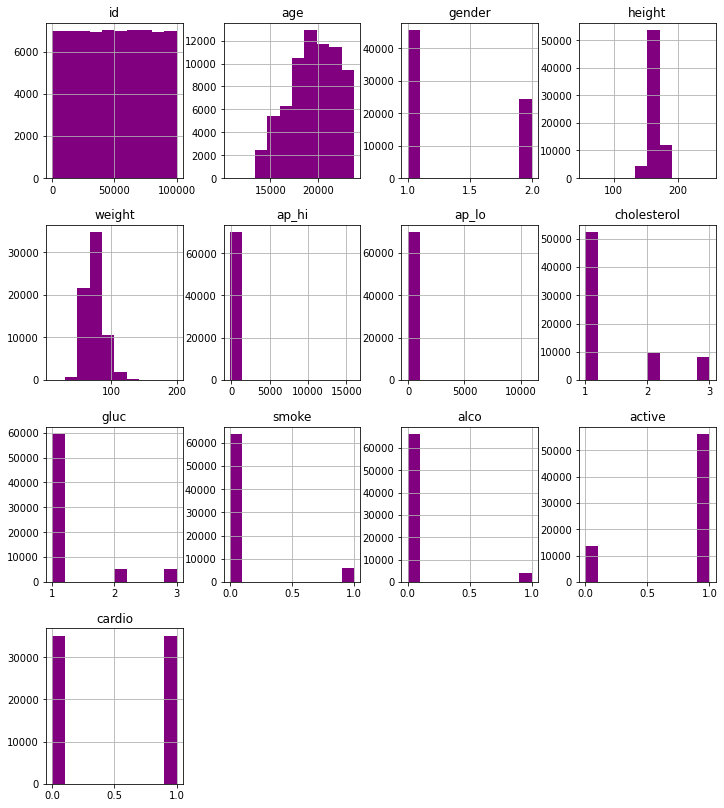

In [10]:
#visualizing the distribution of data in each feature 
dataframe.hist(figsize=(12,14), color = "purple")
plt.show()

In [13]:
# From the dataset, we can see that age is in number of days, we need to change the days into years
# Later categorise the age into groups for easier implementation
def age_years(no_of_days):
  Total_days = 365.2425
  age_in_years = int(no_of_days // Total_days)
  return age_in_years

#Dividing the ages into groups
def age_groups(age_in_years):
  if 0 < age_in_years <= 10:
    return "10s"
  elif 10 < age_in_years <= 30:
    return "20s"
  elif 20 < age_in_years <= 30:
    return "30s"
  elif 30 < age_in_years <= 40:
    return "40s"
  elif 40 < age_in_years <= 50:
    return "50s"
  elif 50 < age_in_years <= 60:
    return "60s"
  elif 60 < age_in_years <= 70:
    return "70+"

# Categorizing the age groups as per the guidelines issued by 
# US National Library of Medicine National Institutes of Health
def age_categories(age_in_years):
  if 0 < age_in_years <= 2:
    return "Infants"
  elif 2 < age_in_years <= 5:
    return "Pre School Child"
  elif 5 < age_in_years <= 12:
    return "Child"
  elif 12 < age_in_years <= 19:
    return "Adolescent"
  elif 19 < age_in_years <= 24:
    return "Young Adult"
  elif 24 < age_in_years <= 44:
    return "Adult"
  elif 44 < age_in_years <= 65:
    return "Middle Aged"
  elif 65 < age_in_years:
    return "Aged"

In [14]:
# adding the newly computed age, age_groups and age categorized into the dataframe
dataframe['new_age'] = dataframe['age'].apply(lambda x: age_years(x))
dataframe['age_categories'] = dataframe['new_age'].apply(lambda x: age_categories(x))
dataframe['age_in_tees'] = dataframe['new_age'].apply(lambda x: age_groups(x))
dataframe.head() #visualizing the dataframe after adding the new columns

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,age_categories,age_in_tees
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Middle Aged,50s
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Middle Aged,60s
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Middle Aged,60s
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Middle Aged,50s
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Middle Aged,50s


<AxesSubplot:xlabel='age_categories', ylabel='count'>

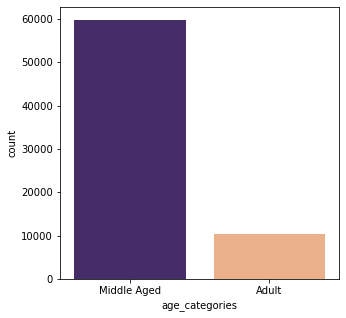

In [15]:
# Checking the distribution of data in age_categories
rcParams['figure.figsize'] = 5, 5
sns.countplot(x ='age_categories', data = dataframe, palette=['#432371',"#FAAE7B"])

We can see that most of the people included are from the category of middle age whereas adults form the minority of the group

<AxesSubplot:xlabel='age_categories', ylabel='count'>

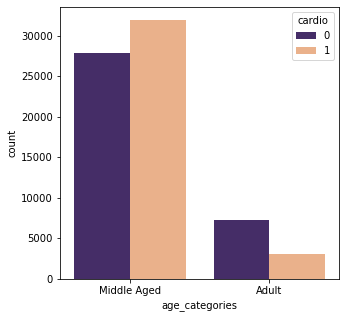

In [16]:
#visualizing number of people exposed to the risk of CVD
rcParams['figure.figsize'] = 5, 5
sns.countplot(x ='age_categories', hue = 'cardio', data = dataframe, palette=['#432371',"#FAAE7B"]) 

We can see that most of the people exposed to CVD are middle aged people including both male and female. In this case again adults form the minority.

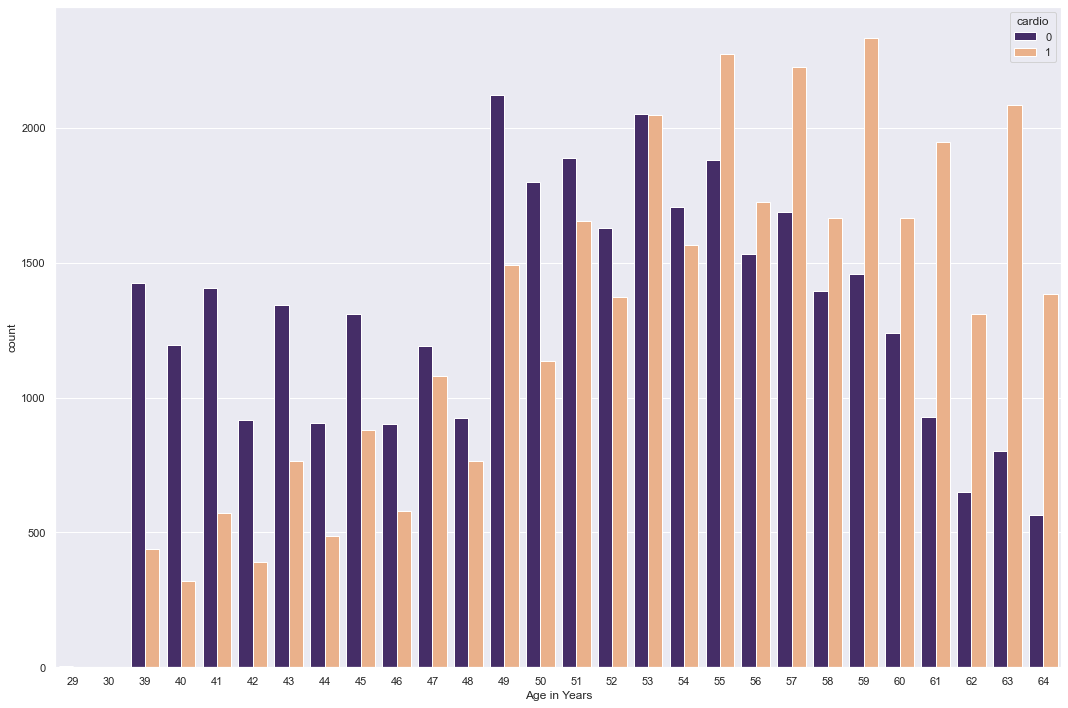

In [148]:
#plot of patient's ages in years
d = sns.countplot(x='new_age', hue='cardio', data = dataframe, palette=['#432371',"#FAAE7B"]);
d.set_xlabel('Age in Years')
sns.set(rc={'figure.figsize':(15,10)})

From the distribution it is difficult to say after which age the number of CVD cases are high. Hence dividing the ages into categories and visualizing could be of help which is performed in the next cell

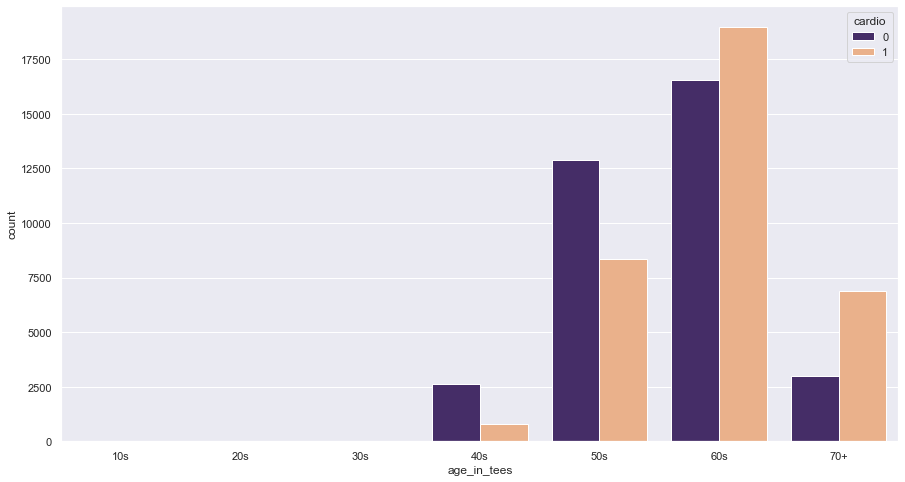

In [18]:
sns.countplot(x='age_in_tees', hue='cardio', data = dataframe, palette=['#432371',"#FAAE7B"], order = ['10s','20s','30s','40s','50s','60s','70+']);
sns.set(rc={'figure.figsize':(10,8)})

From the graph we can now infer that people in their 60s and ages above 70 are more exposed to the risk of CVD. We can also note that there are no CVD cases in the age group of 10 to 30.

Next, we will check the distribution of data considering specific features like height, alcohol and gender ratio

In [19]:
dataframe.groupby('gender')['height'].mean()

#It shows that on average, men (label 2) are taller than women (label 2) 

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [20]:
# Alcohol consumption 
dataframe.groupby('gender')['alco'].sum()

#It shows that on average, men consume more alcohol than women 

gender
1    1161
2    2603
Name: alco, dtype: int64

In [21]:
# Gender Ratio
dataframe['gender'].value_counts()

#shows there are more female patients than male

1    45530
2    24470
Name: gender, dtype: int64

In [22]:
# Checking the visual distribution in the gender feature
dataframe['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

The CVD distribution can be seen as almost equal betweem females and males

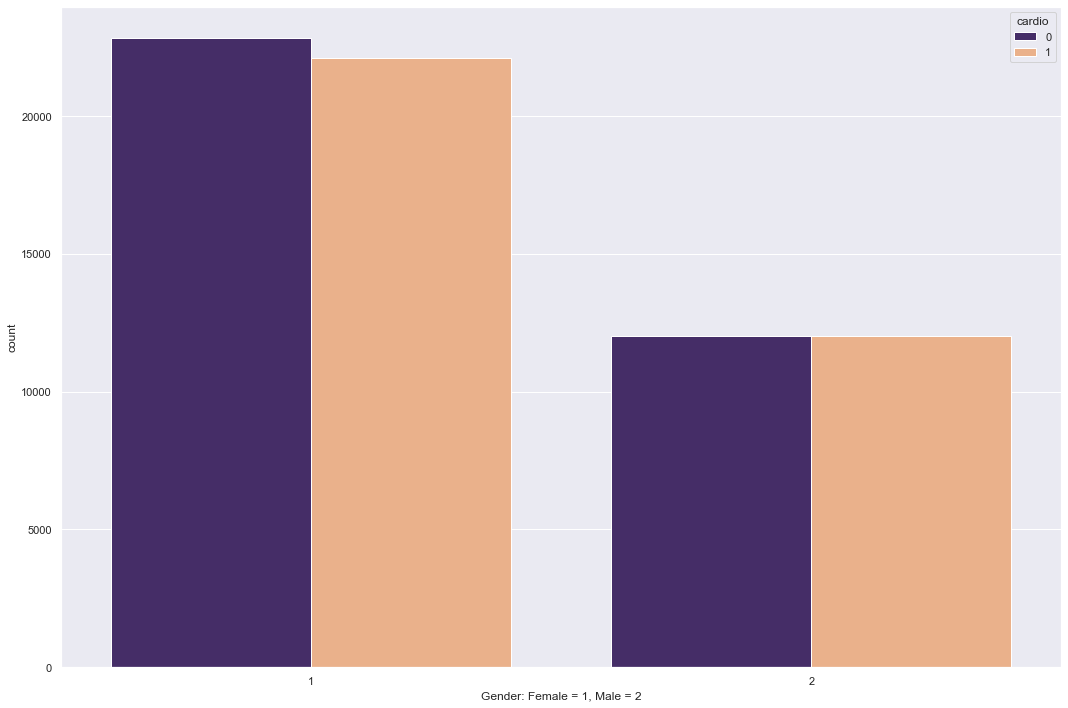

In [149]:
#provides a visual representation of the equal distribution of the disease and also the imbalance of genders
c = sns.countplot(x='gender', hue='cardio', data = dataframe, palette=['#432371',"#FAAE7B"]);
c.set_xlabel('Gender: Female = 1, Male = 2')
sns.set(rc={'figure.figsize':(7,7)})



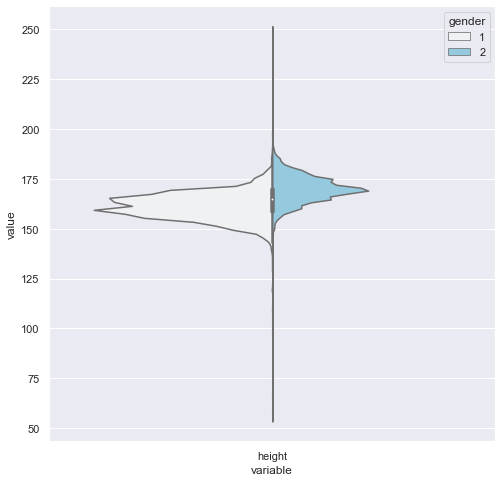

In [24]:
# Height Distribution 
dataframe_graph = pd.melt(frame=dataframe, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(8, 8))
axis = sns.violinplot(x='variable', y='value', hue='gender', split=True, data=dataframe_graph, scale='count', color="skyblue");


Compares the weight distribution of each gender using a violin plot. We can see the median, the middle dot, in the plot is around 60-70 kg. 

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women.
Source : https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm

Formula used to calculate BMI is 
BMI = kg/m2 
    kg - person's weight in kilograms; 
    m2 - height in metres squared

<AxesSubplot:ylabel='BMI_State'>

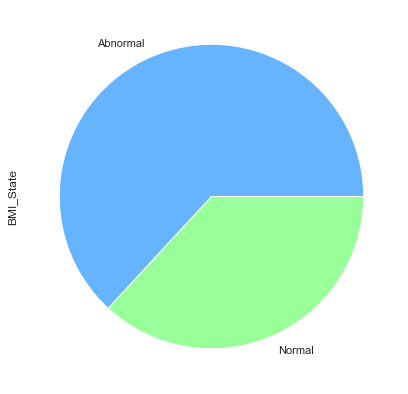

In [25]:
# calculate the BMI score 
dataframe['BMI'] = dataframe['weight']/((dataframe['height']/100)**2)

# dividing the bmi score values into categories
def bmi_score_category(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

dataframe["BMI_State"] = dataframe["BMI"].apply(lambda x: bmi_score_category(x))
dataframe["BMI_State"].value_counts().plot(kind='pie', colors = ['#66b3ff','#99ff99'], figsize=(7, 7))

Shows that most of the patients tested have an abnormal weight versus normal weight.

Next we check how many people are prone to CVD based on the normal and abnormal BMI values

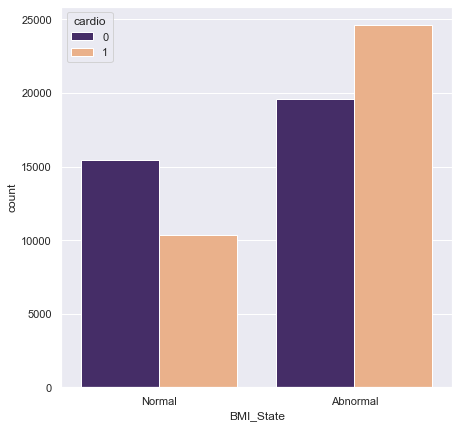

In [26]:
#distribution of patients based on BMI state
sns.countplot(x='BMI_State', hue='cardio', data = dataframe, palette=['#432371',"#FAAE7B"]);
sns.set(rc={'figure.figsize':(5,5)})

Normal range for BMI score is 18.5 to 25. From the plot above, we can say that people who have normal BMI score are less affected by CVD compared to people with abnormal BMI score

In the next couple of cells we check for the factors which lead to abnormal BMI score like alcohol addiction, physical inactivity etc.

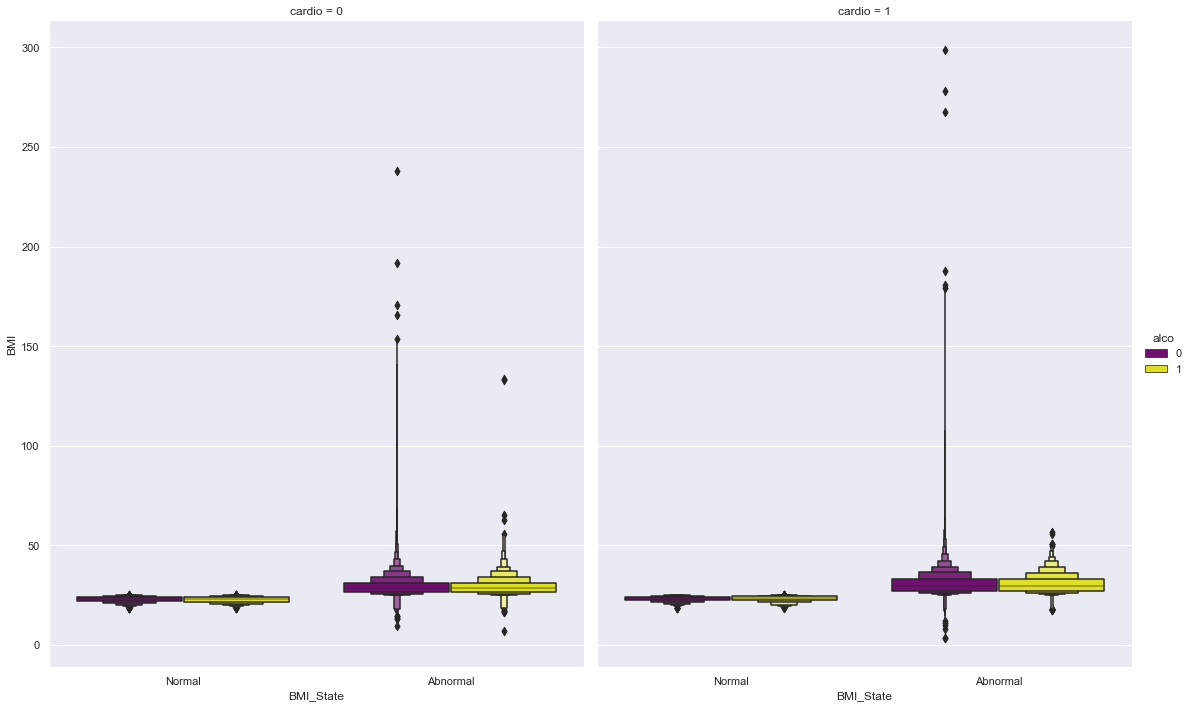

In [27]:
#visualizing the correlation between alcohol consumption and BMI score
sns.catplot(x="BMI_State", y="BMI" , hue="alco", col="cardio", data=dataframe, kind="boxen", height=10, aspect=0.8, palette=sns.color_palette(['purple', 'yellow']))



From the graph, we can see that alcohol has not much of an impact on the BMI score

However, according American Health board, some of the factors that lead to the risk of CVD include hypertension, cholesterol, physical inactivity, obesity, smoking etc. In the next few sections, we try to prove if these factors are indeed the causes of CVD

<AxesSubplot:ylabel='Alcohol: 0 = Does not Drink, 1 = Drinks Alcohol'>

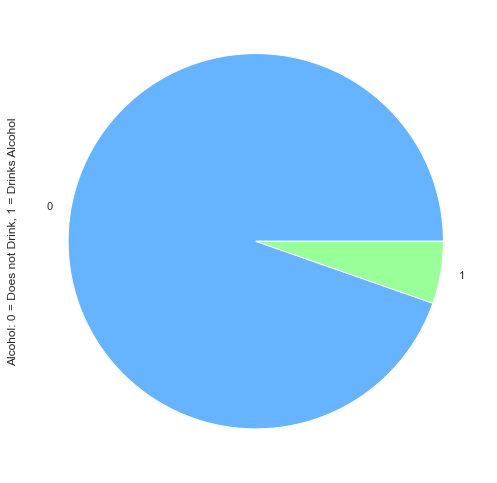

In [136]:
# Plot to check distribution for alcohol consumption 
dataframe["alco"].value_counts().plot(kind='pie', colors = ['#66b3ff','#99ff99'], figsize=(7, 7), ylabel = 'Alcohol: 0 = Does not Drink, 1 = Drinks Alcohol')

From the piechart, most of the patients are not alcoholic

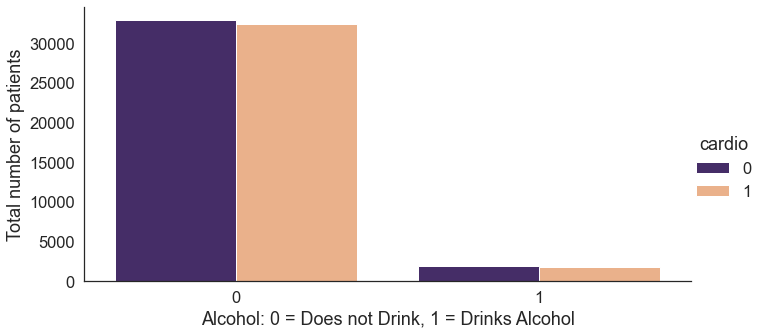

In [131]:
# Checking if patients are influenced by alcohol consumption
with sns.axes_style('white'):
    g = sns.factorplot("alco", data=dataframe, aspect=2.0, kind='count', hue='cardio', palette=['#432371',"#FAAE7B"])
    g.set_ylabels('Total number of patients')
    g.set_xlabels('Alcohol: 0 = Does not Drink, 1 = Drinks Alcohol')

From the visualizations, we can say that alcohol does not count as a factor responsible for CVD

Next we will look into factors like smoking and physical inactivity

<AxesSubplot:ylabel='Smoking: 0 = non-smoker, 1 = smoker'>

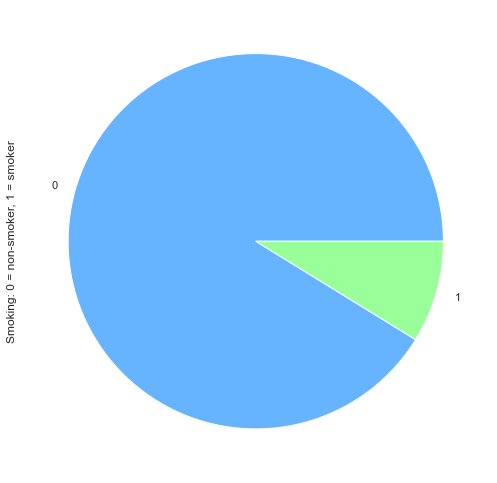

In [135]:
#pie chart of smokers vs non-smokers
dataframe["smoke"].value_counts().plot(kind='pie', colors = ['#66b3ff','#99ff99'], figsize=(7, 7), ylabel = 'Smoking: 0 = non-smoker, 1 = smoker')

From the distribution of data, we can see that most of the patients are the ones who do not smoke

Next we need to check if smoking indeed is a factor for CVD

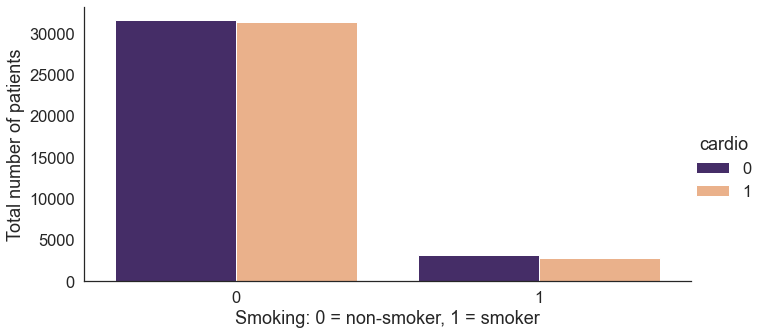

In [128]:
#bar plot of Smokers vs non-Smokers, broken down into patients with CVD = 0, patients without CVD = 1 
with sns.axes_style('white'):
    g = sns.factorplot("smoke", data=dataframe, aspect=2.0, kind='count', hue='cardio', palette=['#432371',"#FAAE7B"])
    g.set_ylabels('Total number of patients')
    g.set_xlabels('Smoking: 0 = non-smoker, 1 = smoker')

We can see a contradiction from the report of American Health board, that smoking is a cause of CVD. However, from the visualizations, we can see that non-smokers are more prone to CVD

Next we will check the distribution of data for physical inactivity

<AxesSubplot:ylabel='Physical Activity: 0 = not active, 1 = active'>

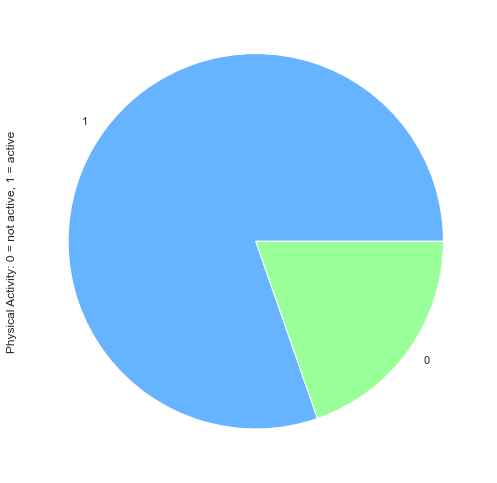

In [134]:
#Pie chart of physical activity of patients
dataframe["active"].value_counts().plot(kind='pie', colors = ['#66b3ff','#99ff99'], figsize=(7, 7), ylabel = "Physical Activity: 0 = not active, 1 = active")


From the distribution we can see that people who are physically active constitute the majority of the dataset

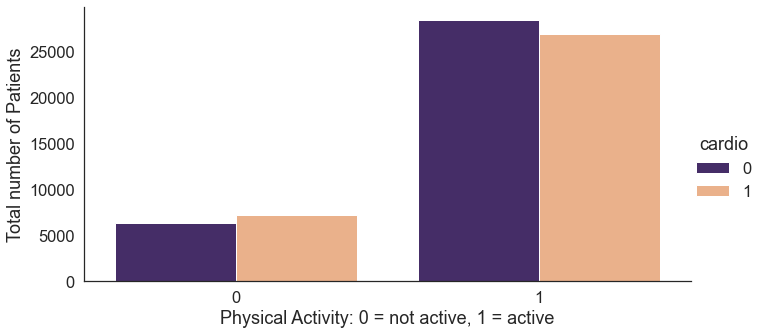

In [127]:
#Bar plot of physical activity of patients withh respect to cardiovascular disease
with sns.axes_style('white'):
    g = sns.factorplot("active", data=dataframe, aspect=2.0, kind='count', hue='cardio', palette=['#432371',"#FAAE7B"])
    g.set_ylabels('Total number of Patients')
    g.set_xlabels('Physical Activity: 0 = not active, 1 = active')

This visualization confirms the report of American Health board that physically active people are not prone to CVD

In the case of blood pressure, it is measured in terms of systolic and diastolic blood pressure. As per the American Heart Association guidelines, normal systolic pressure is 120-180mm and normal diastolic blood pressure is 80-120mm. 

According to a recent study, the maximum blood pressure recorded was 370/360mm Hg. Hence we can drop off the values beyond the range of 250 in case of diastolic pressure and above 200 in case of systolic pressure. Before that, let's visualize if there are any outliers in our dataset

<AxesSubplot:ylabel='ap_hi'>

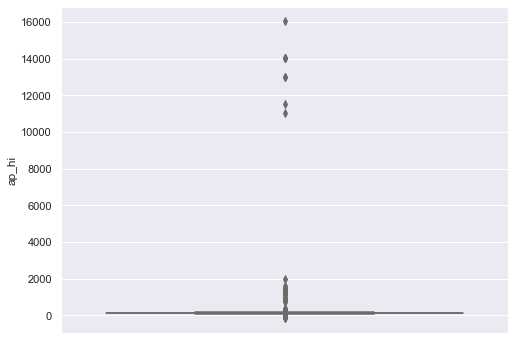

In [34]:
# Plotting box plot for systolic pressure
plt.figure(figsize=(8,6))
sns.boxplot( y=dataframe["ap_hi"], palette="Set3")

<AxesSubplot:ylabel='ap_lo'>

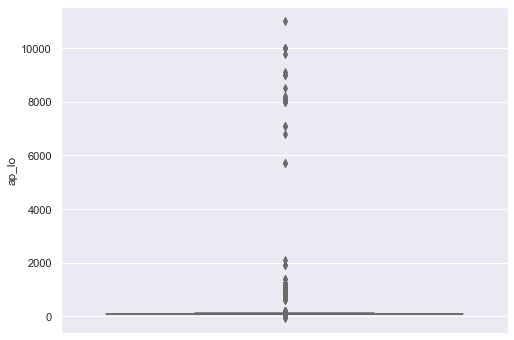

In [35]:
# Plotting box plot for diastolic pressure
plt.figure(figsize=(8,6))
sns.boxplot( y=dataframe["ap_lo"], palette="Set3")

Now we can remove the outliers and catgorize the blood pressure feature

In [36]:
#removing outliers
outlier_rem = ((dataframe["ap_hi"]>250) | (dataframe["ap_hi"]>250) | (dataframe["ap_lo"]>200) )
dataframe_outlier = dataframe[~outlier_rem]

Now we can visualize the distribution of data after removing outliers

<AxesSubplot:ylabel='ap_hi'>

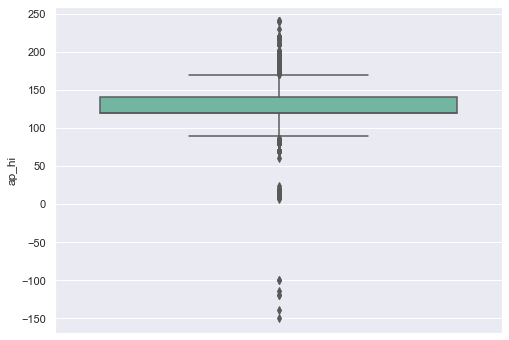

In [37]:
# Plotting box plot for systolic pressure
plt.figure(figsize=(8,6))
sns.boxplot( y=dataframe_outlier["ap_hi"], palette="Set2")

<AxesSubplot:ylabel='ap_lo'>

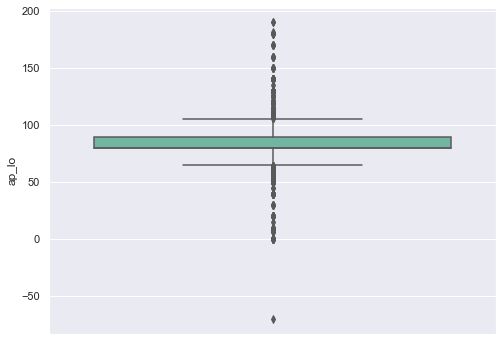

In [38]:
# Plotting box plot for diastolic pressure
plt.figure(figsize=(8,6))
sns.boxplot( y=dataframe_outlier["ap_lo"], palette="Set2")

Now we can categorize the blood pressure feature

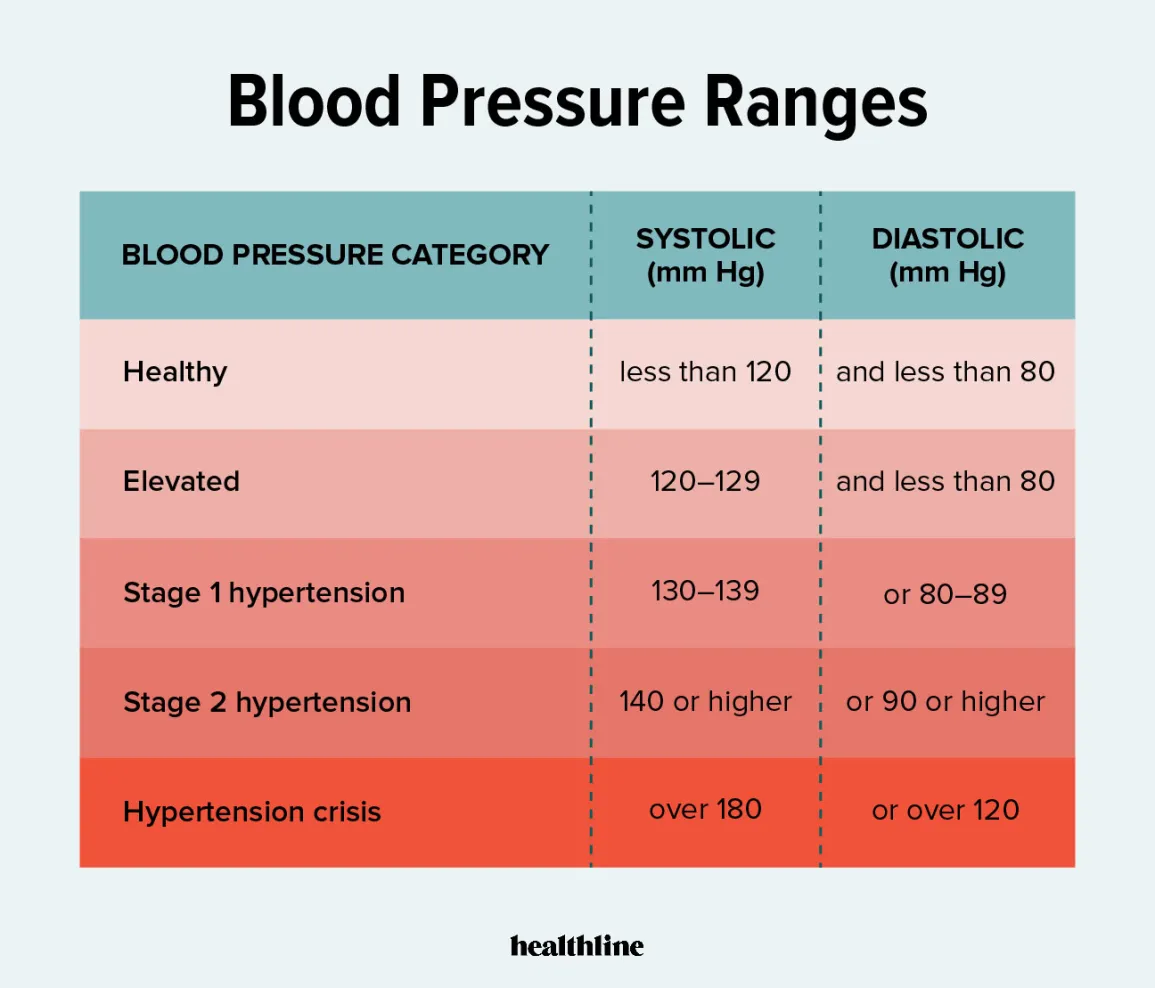

In [39]:
#categorizing blood pressure based on systolic and dystolic bp
#adding new category
def bloodpressure_categories(x):
  if x['ap_hi'] < 120 and x['ap_lo'] < 80: #Categorizing the values in the normal range 
    return "Normal"
  elif 120 <= x['ap_hi'] <= 129 and x['ap_lo'] < 80:
    return "Elevated"
  elif 130 <= x['ap_hi'] <= 139 or 80 <= x['ap_lo'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['ap_hi'] <= 180 or 90 <= x['ap_lo'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['ap_hi'] > 180 and  x['ap_lo'] > 120) or (x['ap_hi'] > 180 or x['ap_lo'] > 120):
    return "Hypertension Crisis"

# removing the outliers
outlier_rem = ((dataframe["ap_hi"]>250) | (dataframe["ap_hi"]>250) | (dataframe["ap_lo"]>200) )
dataframe = dataframe[~outlier_rem]
dataframe['blood_category'] = dataframe.apply(bloodpressure_categories, axis=1)
dataframe.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,age_categories,age_in_tees,BMI,BMI_State,blood_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Middle Aged,50s,21.967120,Normal,High Blood Pressure(Stage 1)
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Middle Aged,60s,34.927679,Abnormal,High Blood Pressure(Stage 2)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Middle Aged,60s,23.507805,Normal,High Blood Pressure(Stage 1)
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Middle Aged,50s,28.710479,Abnormal,High Blood Pressure(Stage 2)
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Middle Aged,50s,23.011177,Normal,Normal


Now we can visualize the distribution of data in each of these categories

<AxesSubplot:ylabel='blood_category'>

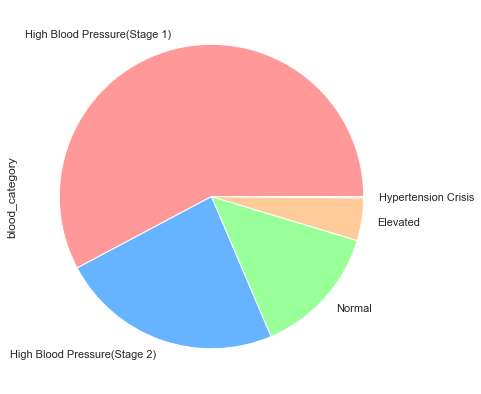

In [40]:
#pie chart of blood pressure categories: Hypertension Crisis, Elevated, Normal, High Blood Pressure (Stage 2), High Blood Pressure (Stage 1)
dataframe["blood_category"].value_counts().plot(kind='pie', colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'], figsize=(7, 7))

The highest proportion of patients have Stage 1 High Blood pressure, 140 <= 'ap_hi' <= 180 or 90 <= 'ap_lo' <= 120

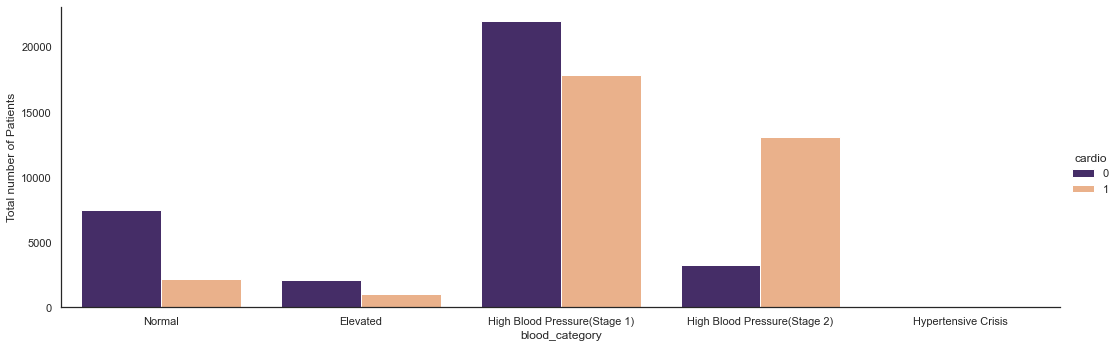

In [41]:
#bar plot of the different types of blood pressure categories with respect to CVD
with sns.axes_style('white'):
    g = sns.factorplot("blood_category", data=dataframe, aspect=3.0, kind='count', hue='cardio', palette=['#432371',"#FAAE7B"], order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
    g.set_ylabels('Total number of Patients')
    

From this chart, we can say that people belonging to 'High Blood Pressure(Stage 1)' are exposed to the risk of CVD in comparison with other categories

Moving on to the cholesterol, as is commonly known is one of the key risk factors for CVD. We need to check visually if that is indeed the case in our dataset. The division of cholesterol feature is - 1: normal, 2: above normal, 3: well above normal

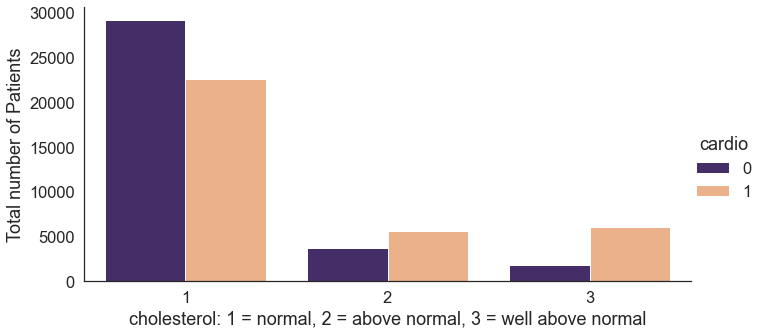

In [125]:
#bar plot showing different types of cholesterol with respect to CVD
with sns.axes_style('white'):
    g = sns.factorplot("cholesterol", data=dataframe, aspect=2.0, kind='count', hue='cardio', palette=['#432371',"#FAAE7B"])
    g.set_ylabels('Total number of Patients')
    g.set_xlabels('cholesterol: 1 = normal, 2 = above normal, 3 = well above normal')

From the chart, we can say that people belonging to the category 'normal' are more prone to the risk of CVD

Next feature is glucose level. Even though glucose level does not impact CVD directly, we can still take a look at the distribution of data

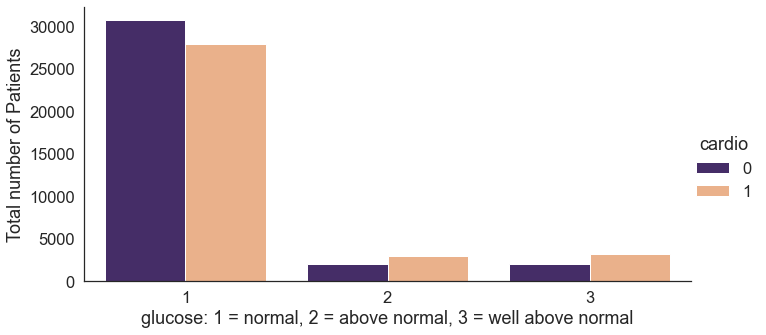

In [124]:
#bar plot showing different types of glucose with respect to CVD
with sns.axes_style('white'):
    g = sns.factorplot("gluc", data=dataframe, aspect=2.0, kind='count', hue='cardio', palette=['#432371',"#FAAE7B"])
    g.set_ylabels('Total number of Patients')
    g.set_xlabels('glucose: 1 = normal, 2 = above normal, 3 = well above normal')

Now we can select only those features which we will be using for predictions.

In [44]:
#new data set with features used for predictions
new_df = dataframe[["gender","age_in_tees","BMI","BMI_State","cholesterol","gluc","active","blood_category","cardio"]].copy()
new_df.head()

,gender,age_in_tees,BMI,BMI_State,cholesterol,gluc,active,blood_category,cardio
0,2,50s,21.967120,Normal,1,1,1,High Blood Pressure(Stage 1),0
1,1,60s,34.927679,Abnormal,3,1,1,High Blood Pressure(Stage 2),1
2,1,60s,23.507805,Normal,3,1,0,High Blood Pressure(Stage 1),1
3,2,50s,28.710479,Abnormal,1,1,1,High Blood Pressure(Stage 2),1
4,1,50s,23.011177,Normal,1,1,0,Normal,0


Now we have 3 columns with categorical values viz., BMI_State, blood_category and age_in_tees. As a final step of preprocessing we need to one-hot encode these 3 columns

In [45]:
#preprocessing 
le = preprocessing.LabelEncoder()
# one hot encoding the age tees
le.fit(new_df['age_in_tees'])
new_df['age_in_tees'] = le.transform(new_df['age_in_tees'])
# one hot encoding the blood category
le.fit(new_df['blood_category'])
new_df['blood_category'] = le.transform(new_df['blood_category'])
#one-hot encoding the BMI_state
le.fit(new_df['BMI_State'])
new_df['BMI_State'] = le.transform(new_df['BMI_State'])
#printing out the final dataframe
new_df.head()

,gender,age_in_tees,BMI,BMI_State,cholesterol,gluc,active,blood_category,cardio
0,2,2,21.967120,1,1,1,1,1,0
1,1,3,34.927679,0,3,1,1,2,1
2,1,3,23.507805,1,3,1,0,1,1
3,2,2,28.710479,0,1,1,1,2,1
4,1,2,23.011177,1,1,1,0,4,0


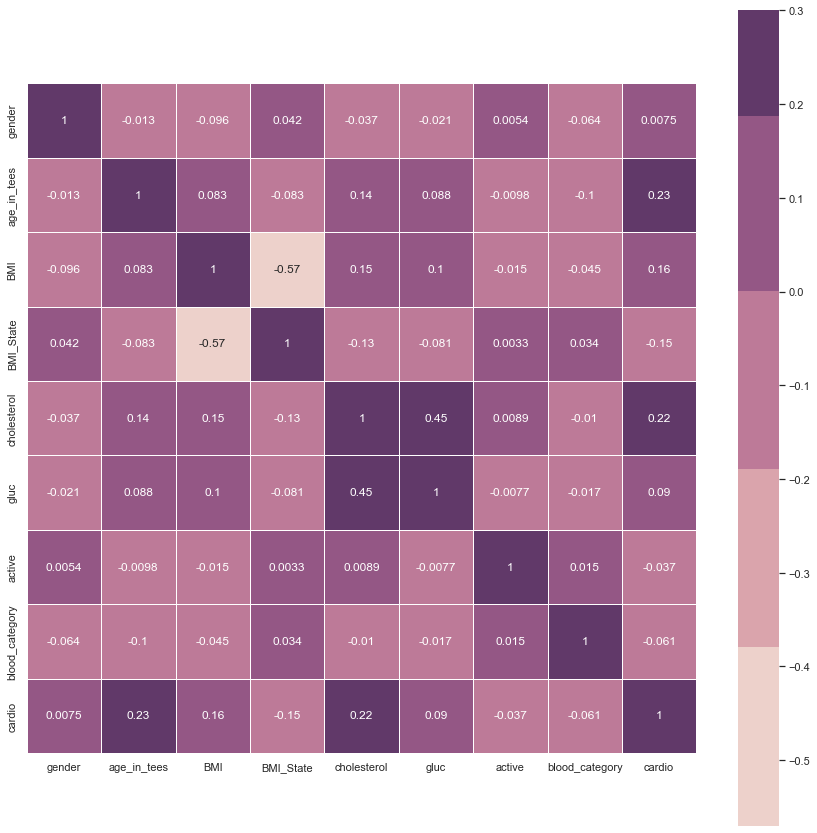

In [46]:
#plotting the correlation map for all the features 
new_df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(new_df.corr(), annot=True, linewidths=0.5, square=True, vmax=0.3, center=0, cmap=sns.cubehelix_palette())


In [47]:
#Neural Networks
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#splitting the dataframe into target columns and feature set
X = new_df.drop(['cardio'], axis=1)
Y = new_df['cardio']

# Initializing the Neural network
model = Sequential()
# Adding the input layer and first hidden layer
model.add(Dense(32, input_dim=8, activation='relu')) 
#adding the second hidden layer
model.add(Dense(8, activation='relu')) # applying relu activation function to remove negative values
#adding final output layer
model.add(Dense(1, activation='sigmoid')) #applying sigmoid activation function to get the probability values for each class



2022-04-26 14:40:14.892392: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
# Now we train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # we have used adam optimizer and BCE loss function for the purpose of optimization
tensor_board_CallBack = keras.callbacks.TensorBoard(log_dir='/logs', 
                                                    histogram_freq=0, 
                                                    write_graph=True, 
                                                    write_images=True)

# Training the model for 100 epoch with batch size as 16
hist = model.fit(X, Y,validation_split=0.20, epochs=100, batch_size=16,callbacks=[tensor_board_CallBack])

# evaluating the performance of the model
scores = model.evaluate(X, Y)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
3451/3451 [==============================] - 5s 1ms/step - loss: 0.6567 - accuracy: 0.6013 - val_loss: 0.6287 - val_accuracy: 0.6389
Epoch 2/100
3451/3451 [==============================] - 4s 1ms/step - loss: 0.6078 - accuracy: 0.6728 - val_loss: 0.6004 - val_accuracy: 0.6804
Epoch 3/100
3451/3451 [==============================] - 4s 1ms/step - loss: 0.5945 - accuracy: 0.6873 - val_loss: 0.5942 - val_accuracy: 0.6887
Epoch 4/100
3451/3451 [==============================] - 4s 1ms/step - loss: 0.5922 - accuracy: 0.6901 - val_loss: 0.5919 - val_accuracy: 0.6863
Epoch 5/100
3451/3451 [==============================] - 4s 1ms/step - loss: 0.5900 - accuracy: 0.6919 - val_loss: 0.5952 - val_accuracy: 0.6894
Epoch 6/100
3451/3451 [==============================] - 4s 1ms/step - loss: 0.5882 - accuracy: 0.6921 - val_loss: 0.5865 - val_accuracy: 0.6964
Epoch 7/100
3451/3451 [==============================] - 5s 1ms/step - loss: 0.5858 - accuracy: 0.6964 - val_loss: 0.5911 - val_ac

3451/3451 [==============================] - 6s 2ms/step - loss: 0.5776 - accuracy: 0.7030 - val_loss: 0.5822 - val_accuracy: 0.6966
Epoch 58/100
3451/3451 [==============================] - 4s 1ms/step - loss: 0.5778 - accuracy: 0.7019 - val_loss: 0.5831 - val_accuracy: 0.6981
Epoch 59/100
3451/3451 [==============================] - 6s 2ms/step - loss: 0.5779 - accuracy: 0.7019 - val_loss: 0.5814 - val_accuracy: 0.7004
Epoch 60/100
3451/3451 [==============================] - 7s 2ms/step - loss: 0.5775 - accuracy: 0.7021 - val_loss: 0.5834 - val_accuracy: 0.6992
Epoch 61/100
3451/3451 [==============================] - 6s 2ms/step - loss: 0.5778 - accuracy: 0.7023 - val_loss: 0.5843 - val_accuracy: 0.6958
Epoch 62/100
3451/3451 [==============================] - 6s 2ms/step - loss: 0.5776 - accuracy: 0.7032 - val_loss: 0.5847 - val_accuracy: 0.6977
Epoch 63/100
3451/3451 [==============================] - 5s 2ms/step - loss: 0.5775 - accuracy: 0.7033 - val_loss: 0.5813 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


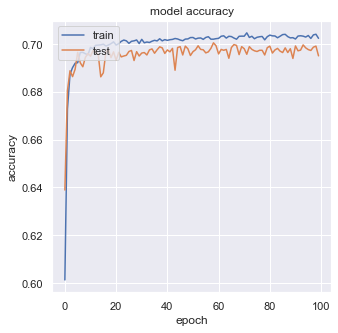

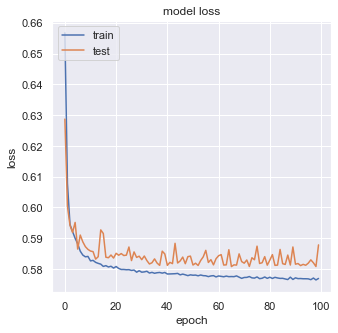

In [49]:
# Evaluating Validation and training results for comparison
print(hist.history.keys())

# Plot for history of accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot for history of loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
#Logistic Regression
#https://www.kaggle.com/code/raihansikdar/prognosis-of-cardiovascular-disease-using-ml/notebook#Feature-Scaling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
#split dataset into test and train sets
x = new_df.iloc[:, 0:-1]
y = new_df.iloc[:, -1]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .40,random_state=1)
#feature scaling to standardize independent features
#https://www.geeksforgeeks.org/ml-feature-scaling-part-2/#:~:text=Feature%20Scaling%20is%20a%20technique,magnitudes%20or%20values%20or%20units.
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [90]:
#train the model with x and y train sets
logReg =LogisticRegression()
logReg.fit(xtrain,ytrain)

LogisticRegression()

In [91]:
#output the score of the training set
LOG_train = logReg.score(xtrain,ytrain)
LOG_train

0.6395758863877886

In [92]:
#output the score of the test set
LOG_test = logReg.score(xtest,ytest)
LOG_test

0.6340977429989494

In [93]:
#output of accuracy of predictions
y_pred_log = logReg.predict(xtest)
accuracy_score(ytest,y_pred_log)

0.6340977429989494

A confusion matrix defines the performance of each machine learning model. 

In [153]:
# value of the confusion matrix are true negative, false positive, false negative, true positive
cf_log = confusion_matrix(ytest,y_pred_log)
cf_log

array([[9319, 4517],
       [5583, 8184]])

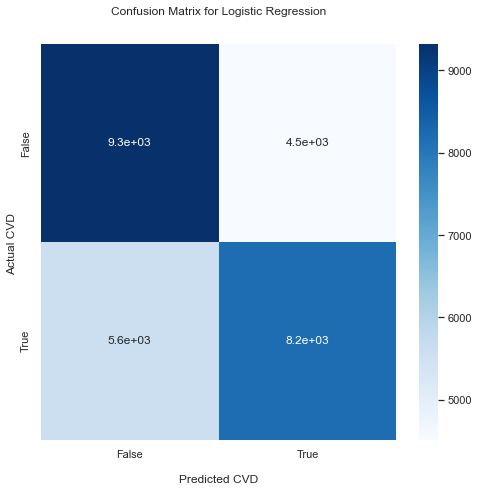

In [158]:
#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=Plot%20Confusion%20Matrix%20for%20Binary%20Classes%20With%20Labels&text=You%20need%20to%20create%20a,matrix%20with%20the%20labels%20annotation.
ax = sns.heatmap(cf_log, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression\n\n');
ax.set_xlabel('\nPredicted CVD')
ax.set_ylabel('Actual CVD ');

# Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [95]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()

In [96]:
#train the model with x and y train sets
bernoulli.fit(xtest,ytest)

BernoulliNB()

In [97]:
#output the score of the training set
BNB_train = bernoulli.score(xtrain,ytrain)
BNB_train

0.6340933243164911

In [98]:
#output the score of the test set
BNB_test = bernoulli.score(xtest,ytest)
BNB_test

0.6294605658805202

In [99]:
#output of accuracy of predictions
y_pred_bnb = bernoulli.predict(xtest)
accuracy_score(ytest,y_pred_bnb)

0.6294605658805202

In [156]:
cf_bernoulli = confusion_matrix(ytest,y_pred_bnb)
cf_bernoulli

array([[8750, 5086],
       [5142, 8625]])

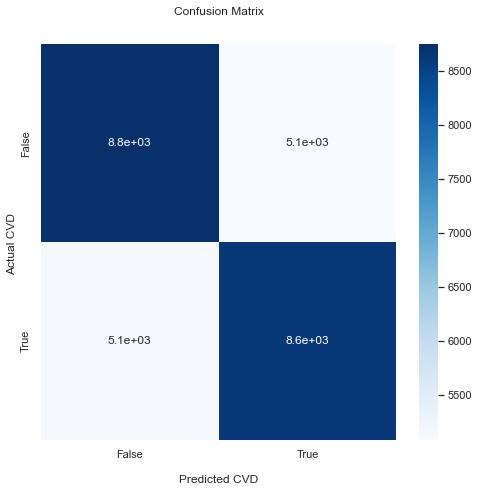

In [157]:
ax = sns.heatmap(cf_bernoulli, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Bernoulli\n\n');
ax.set_xlabel('\nPredicted CVD')
ax.set_ylabel('Actual CVD ');

# Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [101]:
#Random Forest Classifer
X = new_df.drop(['cardio'], 1)
Y = new_df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [102]:
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 69007, dtype: int64

In [103]:
# Running a voting classifier that included random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf)], 
    voting = 'hard')

In [104]:
#output the accuracy of RandomForest and Voting Classifiers
for clf in (rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred_clf))

RandomForestClassifier 0.6249335845046612
VotingClassifier 0.6249335845046612


In [160]:
cf_rf = confusion_matrix(y_test,y_pred_clf)
cf_rf

array([[6753, 3689],
       [4076, 6185]])

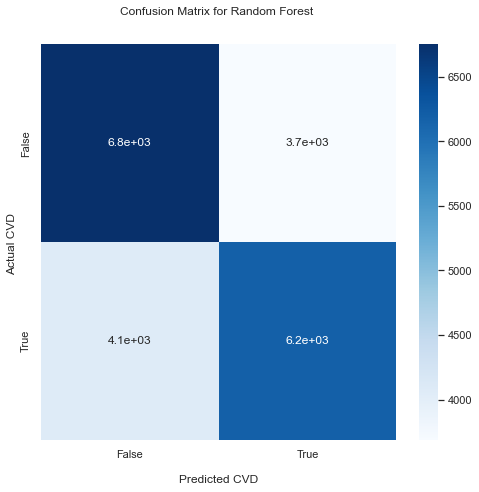

In [161]:
ax = sns.heatmap(cf_rf, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest \n\n');
ax.set_xlabel('\nPredicted CVD')
ax.set_ylabel('Actual CVD ');

# Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [106]:
# Setting the feature names into a list
rnd_clf.feature_names = list(X_train.columns.values)

# Finding important features
feature_imp = pd.Series(rnd_clf.feature_importances_,index=rnd_clf.feature_names).sort_values(ascending=False)
feature_imp

BMI               0.679658
blood_category    0.156234
age_in_tees       0.064229
cholesterol       0.053825
gluc              0.016628
active            0.010270
gender            0.009614
BMI_State         0.009541
dtype: float64

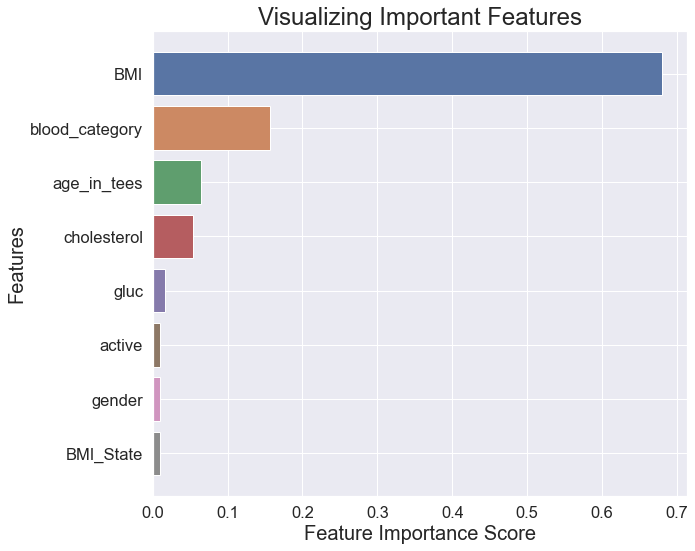

In [107]:
# Visualizing the features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style='darkgrid')
sns.set(font_scale = 1.5)

# Creating a bar plot
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.autolayout'] = True
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score', size=20)
plt.ylabel('Features', size=20)
plt.title("Visualizing Important Features", size=24)
plt.tight_layout()
plt.grid(True)

plt.plot()
plt.show()

In [108]:
#KNN
# Removing the columns not of interest
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X = new_df.drop(['cardio'], 1)
Y = new_df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [109]:
# algorithm used Knn model
# train accuracy
knn_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(X_train, y_train)
y_pred_knn = knn_model.predict(xtest)
acc_knn = round(knn_model.score(X_train, y_train) * 100, 2)
print(acc_knn, knn_model.best_params_)

77.89 {'n_neighbors': 3}


In [110]:
# test accuracy
acc_test_knn = round(knn_model.score(X_test, y_test) * 100, 2)
acc_test_knn

63.93

In [162]:
cf_knn = confusion_matrix(y_test,y_pred_clf)
cf_knn

array([[6753, 3689],
       [4076, 6185]])

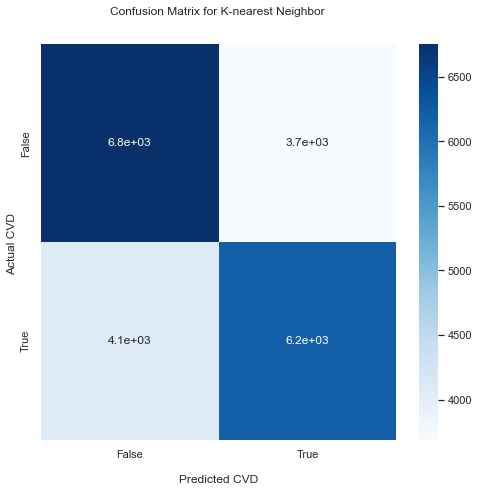

In [163]:
ax = sns.heatmap(cf_knn, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for K-nearest Neighbor \n\n');
ax.set_xlabel('\nPredicted CVD')
ax.set_ylabel('Actual CVD ');

# Ticket labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [112]:
#K-fold Cross-Validation - estimates the skill of 4 models
#https://machinelearningmastery.com/k-fold-cross-validation/
#https://www.kaggle.com/code/raihansikdar/prognosis-of-cardiovascular-disease-using-ml/notebook#Feature-Scaling
from sklearn.model_selection import cross_val_score

cv_score_log = cross_val_score(logReg,xtrain,ytrain,cv=10)
print("Logistic Regression K-fold Cross-Validation Score : ",cv_score_log.mean())

Logistic Regression K-fold Cross-Validation Score :  0.6391171296344906


In [114]:
cv_score_log = cross_val_score(bernoulli,xtrain,ytrain,cv=10)
print("Naive Bayes Bernoulli K-fold Cross-Validation Score : ",cv_score_log.mean())

Naive Bayes Bernoulli K-fold Cross-Validation Score :  0.6325478104544283


In [115]:
cv_score_log = cross_val_score(rnd_clf,xtrain,ytrain,cv=10)
print("Random Forest Classifier K-fold Cross-Validation Score : ",cv_score_log.mean())

Random Forest Classifier K-fold Cross-Validation Score :  0.6326927029924625


In [116]:
cv_score_log = cross_val_score(knn_model,xtrain,ytrain,cv=10)
print("K-nearest Neighbor Classifier K-fold Cross-Validation Score : ",cv_score_log.mean())

K-nearest Neighbor Classifier K-fold Cross-Validation Score :  0.6455902096042054
